### 背景介绍

微博是目前广泛使用的社交网络平台，其便捷性与公开性吸引了不少网民在平台发表言论或见解，每日新增微博在千万量级。人工对每一条消息的真实性进行审核不太现实，因此希望通过对微博数据进行分析，结合微博文本、用户、传播方面的特征，实现谣言的自动化识别或早期检测。

### 数据介绍

案例数据是香港中文大学NLP课题组在2016年发布的，收集了2012年2月至2015年12月期间的380万条微博，涉及274万个用户。谣言数据来自微博社区管理中心中不实信息一栏。非谣言的数据来自同时期一些较权威的微博号发布的微博，并进行了人工审核，并非不实信息。

百度云盘链接：https://pan.baidu.com/s/1Ah3PMFKw3gszvz1BMs3R2g （提取码：33ap）

解压后的`Weibo`文件夹中，每个`json`文件对应每个事件涉及的全部微博，其中包含了微博的id、文本、图片、时间、评论数、转发数，发微博用户的昵称、性别、关注数、粉丝数、好友数、地区等信息。

所有事件的标签存在于 `Weibo.txt` 文件中。标签`0`对应非谣言，标签`1`对应谣言。

`Feature_nonrumor.npy`和`Feature_rumor.npy`文件为通过原始微博提取的28维特征。

### 学习目标

- 了解社交网络数据
- 对文本数据进行简单处理和描述分析。

### 任务一：读入数据

读入`Weibo.txt`文件，存储为`id_label_dict`字典，键为微博`id`，值为标签`0`或`1`。

批量读入`json`文件，读取原始微博的`text`和`reposts_count`字段，分别存储为`id_text`，`id_repost`字典。

展示转发数目最高的5条谣言和非谣言。

In [1]:
import json
import os
from tqdm import tqdm

data_path = r"C:\DS\Datasets\weibo\Weibo"
label_path = r"C:\DS\Datasets\weibo\Weibo.txt"

# load label
with open(label_path, "r") as f:
    s = f.readlines()
id_label_dict = {}
for line in s:
    id_label = [item.split(':')[1] for item in line.split('\t')[:2]]
    id_label_dict[id_label[0]] = eval(id_label[1])

# load data
id_text = {}
id_repost = {}
filenames = os.listdir(data_path)
for filename in tqdm(filenames):
    with open(os.path.join(data_path, filename), "r", encoding="utf-8") as f:
        s = json.load(f)
    id_text[s[0]["id"]] = s[0]["text"]
    id_repost[s[0]["id"]] = s[0]["reposts_count"]

id_info = [(key, id_label_dict[key], id_text[key], id_repost[key]) for key in id_label_dict.keys()]
nonrumors = [item for item in id_info if item[1]==0]
rumors = [item for item in id_info if item[1]==1]
nonrumors_top5 = sorted(nonrumors, key=lambda x:x[3], reverse=True)
rumors_top5 = sorted(rumors, key=lambda x:x[3], reverse=True)

print("====== nonrumor top5 ======")
for i in range(5):
    print("No. %d |" % (i+1), "转发量: %6d |" % nonrumors_top5[i][3], nonrumors_top5[i][2])    
print("\n====== rumor top5 ======")
for i in range(5):
    print("No. %d |" % (i+1), "转发量: %6d |" % rumors_top5[i][3], rumors_top5[i][2])

100%|██████████████████████████████████████████████████████████████████████████████| 4664/4664 [01:41<00:00, 45.90it/s]


====== nonrumor top5 ======
No. 1 | 转发量:  81776 | 【[话筒]扩散：#2016放假安排公布# 最新！】①元旦1月1日放假 ②春节：2月7日(除夕)-13日放假，2月6日、14日上班 ③清明：4月4日，连休3天 ④劳动节：5月1日，连休3天 ⑤端午：6月9日-11日放假，12日上班 ⑥中秋：9月15日-17日放假，18日上班 ⑦国庆节：10月1日-7日放假，10月8日、10月9日上班。转存！
No. 2 | 转发量:  54202 | #屠呦呦颁奖典礼#【一起为这位中国女科学家转发，致敬！】北京时间昨夜，青蒿素第一发明人、中国科学家屠呦呦在瑞典首都斯德哥尔摩音乐厅，从瑞典国王卡尔十六世•古斯塔夫手中接过2015年诺贝尔生理学或医学奖证书、奖章。这是中国科学家在中国本土进行的科学研究首次获诺贝尔科学奖。致敬！[赞]
No. 3 | 转发量:  31843 | 【你愿帮这27名孩子转发吗？1岁就被拐卖[泪]】这27名孩子，是警方打拐解救的孩子，他们被解救时才1岁，他们可能根本记不得亲生父母的模样了……有的孩子已被解救10余年，但仍然没有亲人的消息。你能想象这些孩子渴望依偎的妈妈怀中的感受吗？请将这条微博转给更多人！帮宝贝回家！多个转发，多份希望！
No. 4 | 转发量:  23487 | 【最新消息：#我国平均26岁结婚# 现在90后已算晚婚！】中国妇联发起的“调查报告”指出，我国平均26岁结婚，90%的女性在30岁前结婚。你被催婚了吗？其实，幸福婚姻并不在何时结婚，调查显示，忠诚、体贴才是幸福的基石，仅剩6周，2015就结束了，新一年，祝大家找到幸福！为爱转发！[心](央视记者谭臻)
No. 5 | 转发量:  22592 | 今天，我想向大家介绍几位少数民族的警察。

====== rumor top5 ======
No. 1 | 转发量: 103682 | 2月30号，我们在休假，蒙牛却在为我们生产良心奶[泪]
No. 2 | 转发量:  92183 | 一只幼猴紧紧搂住即将被“活取猴脑”的妈妈。（转）
No. 3 | 转发量:  80679 | 如果刘翔得了伦敦奥运会金牌，凡转发并关注我的网友，所有人送一台最新版的iPhone+iPad+Mac Air。记住，不是一个人，而是所有人。信誉保证，决不骗人，到期兑现！

## 任务二： 绘制事件包含微博数目分布直方图

根据每个事件包含的微博数目绘制分布直方图。（将转发数量在20000以上的归为一类）

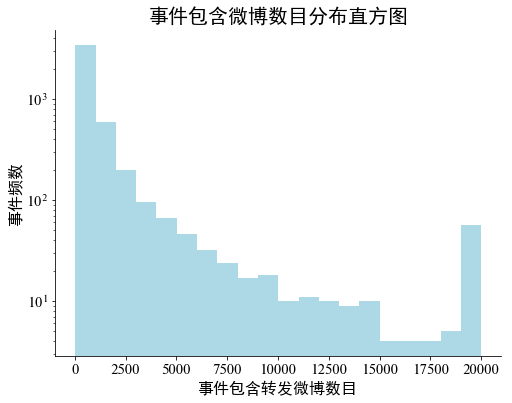

In [3]:
import matplotlib
import matplotlib.pyplot as plt

repost = [min(item, 20000) for item in id_repost.values()]

plt.rcParams['font.sans-serif'] = ['SimHei'] # ensure display of chinese words
plt.rcParams['axes.unicode_minus'] = False   # ensure display of negative sign
font = matplotlib.font_manager.FontProperties(fname=r"C:\Users\Chlorine\Documents\字体\Times_New_Roman.ttf")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(repost, bins=20, log=True, facecolor="lightblue", alpha=1)
ax.set_xlabel("事件包含转发微博数目", fontsize=16)
ax.set_ylabel("事件频数", fontsize=16)
ax.set_title("事件包含微博数目分布直方图", fontsize=20)
plt.grid(False)
plt.xticks(fontproperties=font,fontsize=14,color="black")
plt.yticks(fontproperties=font,fontsize=14,color="black")

ax.spines['top'].set_visible(False)     # remove top frame
ax.spines['right'].set_visible(False)   # remove tight frame
plt.savefig("event_weibo.png", transparent=True)
plt.show()

## 任务三：统计原始微博词频计算词语TF-IDF值

将原始微博文本中的繁体转化为简体。

使用`jieba`进行分词。

对谣言和非谣言分别进行词频统计和词语TF-IDF值计算，展示谣言和非谣言中出现频数最高前10个词。

In [5]:
import os
import re
import json
import numpy as np

import jieba
import nltk
from langconv import *

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# convert traditional into simple
def preprocess(text): 
    text = Converter("zh-hans").convert(text)
    text = text.encode("utf-8").decode("utf-8")
    return " ".join(jieba.cut(text))    

# form word bag and calculate tf-idf
def word_bag(text_list):
    print("---------- calculate tfidf ----------")
    word_list = " ".join(text_list).split(" ")
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(vectorizer.fit_transform(text_list))
    word_bag = vectorizer.get_feature_names()  # all the word
    weight = tfidf.toarray()                   # weight[i][j] represent tf-idf value of word j in ith text
    print("---------- sort according to tfidf and frequency ----------")
    word_freq_dict = nltk.FreqDist(word_list)
    word_tfidf_freq = []
    dtype = [("Word", "U20"), ("tfidf", float), ("freq", int)]
    for i in tqdm(range(weight.shape[1]), ncols=50):  # weight.shape (文档数，词数)
        tfidf_array = weight[:, i]
        word_tfidf_freq.append((word_bag[i], np.mean(tfidf_array), word_freq_dict[word_bag[i]]))
    word_tfidf_freq = np.array(word_tfidf_freq, dtype=dtype)
    word_tfidf_freq = np.sort(word_tfidf_freq, order=["freq", "tfidf"])[::-1]
    return word_tfidf_freq

nonrumor_text = [preprocess(item[2]) for item in nonrumors]
rumor_text = [preprocess(item[2]) for item in rumors]
word_tfidf_freq_nonrumor = word_bag(nonrumor_text)
word_tfidf_freq_rumor = word_bag(rumor_text)

print("===== top10 words in nonrumors ====")
print("%-10s %-10s %-10s " % ("TF-IDF", "frequency", "word"))
for item in word_tfidf_freq_nonrumor[:10]:
    print("%-10.4f %-10d %-10s" % (item[1], item[2], item[0]))
    
print("\n===== top10 words in rumors ====")
print("%-10s %-10s %-10s " % ("TF-IDF", "frequency", "word"))
for item in word_tfidf_freq_rumor[:10]:
    print("%-10.4f %-10d %-10s" % (item[1], item[2], item[0]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Chlorine\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built succesfully.


---------- calculate tfidf ----------
---------- sort according to tfidf and frequency ----------


100%|████| 20789/20789 [00:01<00:00, 20349.07it/s]


---------- calculate tfidf ----------
---------- sort according to tfidf and frequency ----------


100%|████| 14635/14635 [00:00<00:00, 20890.43it/s]


===== top10 words in nonrumors ====
TF-IDF     frequency  word       
0.0202     862        cn        
0.0202     861        http      
0.0099     323        中国        
0.0119     299        自己        
0.0114     262        一个        
0.0083     201        我们        
0.0058     168        10        
0.0059     166        今天        
0.0064     150        没有        
0.0082     142        什么        

===== top10 words in rumors ====
TF-IDF     frequency  word       
0.0174     559        中国        
0.0106     324        一个        
0.0119     313        转发        
0.0101     287        cn        
0.0101     286        http      
0.0104     280        孩子        
0.0106     266        我们        
0.0111     247        100       
0.0084     230        如果        
0.0088     224        大家        


## 任务四：绘制原始微博词云图
统计谣言中未在非谣言中出现的高频词，以及非谣言中未在谣言中出现的高频词，绘制词云图。

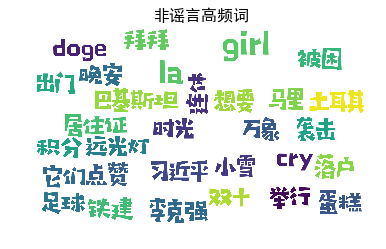

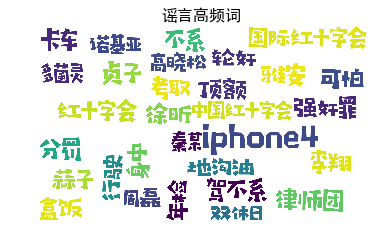

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

font_path = r"C:\Users\Chlorine\Documents\字体\HYZhuZiMuTouRenW.ttf"

word_all_nonrumor = [item[0] for item in word_tfidf_freq_nonrumor]
word_all_rumor = [item[0] for item in word_tfidf_freq_rumor]
word_nonrumor = [word for word in word_all_nonrumor if word not in word_all_rumor]
word_rumor = [word for word in word_all_rumor if word not in word_all_nonrumor]

wc = WordCloud(
    background_color='white', 
    max_words=30, 
    max_font_size=200, 
    font_path=font_path, 
    random_state=42, 
    width=2000, 
    height=1200
)

wc.generate(" ".join(word_nonrumor))
plt.imshow(wc)
plt.axis("off")
plt.title("非谣言高频词", fontsize=16)
plt.show()
print()
wc.generate(" ".join(word_rumor))
plt.imshow(wc)
plt.axis("off")
plt.title("谣言高频词", fontsize=16)
plt.show()

## 任务五：绘制原始微博特征分布箱线图

读入`Feature_nonrumor.npy`文件以及`Feature_rumor.npy`，矩阵大小为`(2313, 28)`，其中`2313`为事件数目，`28`为特征维度。

28维特征分别为`"微博当中是否携带链接", "微博当中是否含有第一人称代词", "微博的积极指数", "微博的消极指数", "微博文本的平均长度", "微博当中褒义词的数量", "微博当中贬义词的数量", "微博的情感得分", "微博当中含有微笑表情的数目", "微博当中含有难过表情的数目", "微博当中是否携带标签", "微博当中是否携带@", "微博当中是否携带问号", "微博当中是否携带感叹号", "微博是否携带多个问句/感叹句标点", "用户是否提供个人描述", "用户是否提供个人图片", "用户是否认证", "用户认证类型", "用户好友数目", "用户是否为男性", "用户是否提供地理信息", "用户粉丝数目", "用户发微博数量", "用户开通账户之后在线天数", "粉丝数/关注数的平均得分", "微博转发数", "微博评论数"`


绘制28维特征在谣言和非谣言的特征分布箱线图。

(对最后三维特征`"粉丝数/关注数的平均得分", "微博转发数", "微博评论数"`取对数后再绘制箱线图)

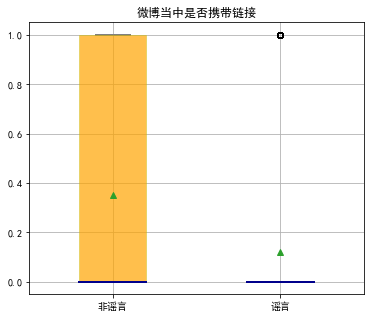

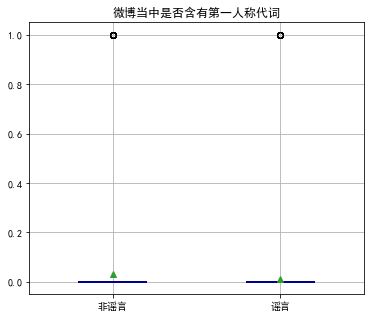

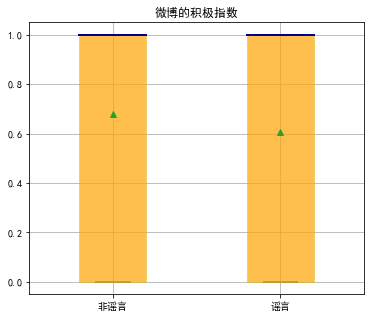

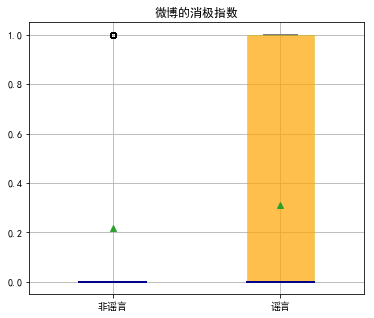

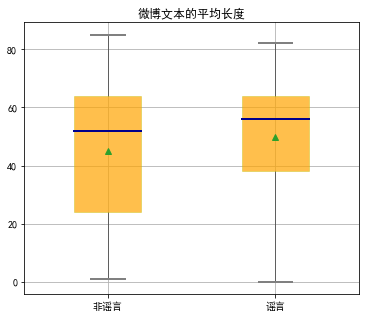

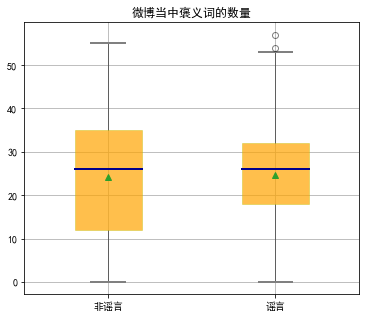

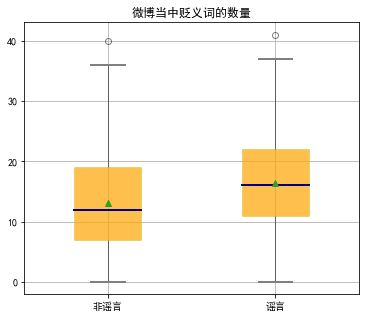

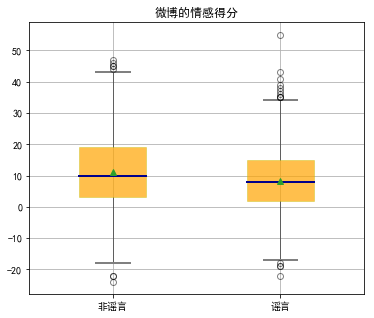

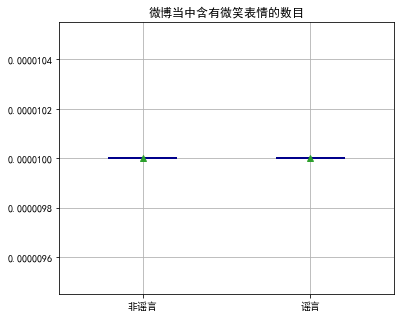

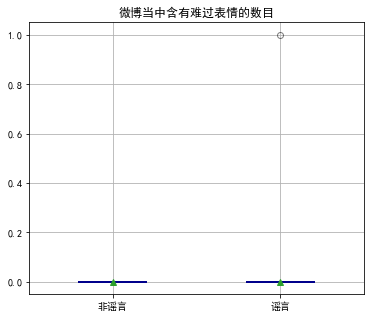

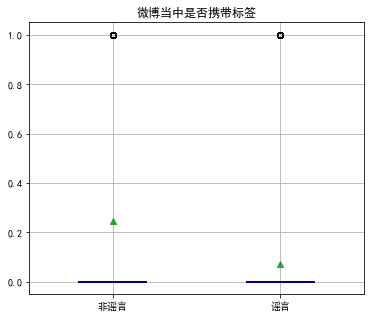

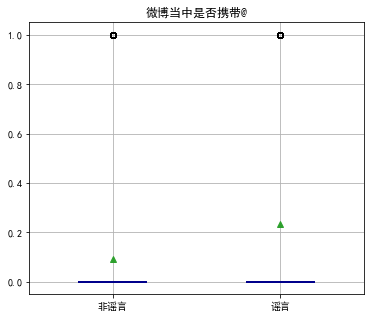

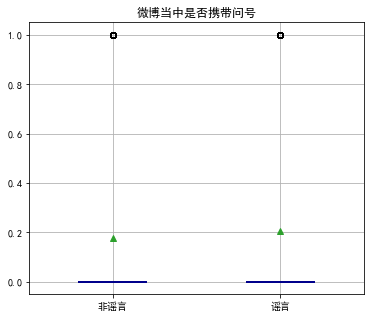

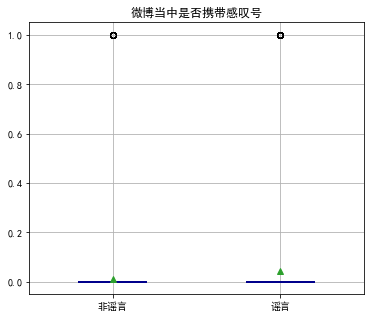

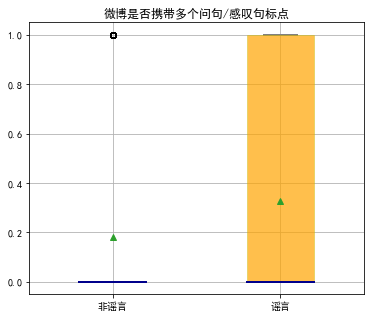

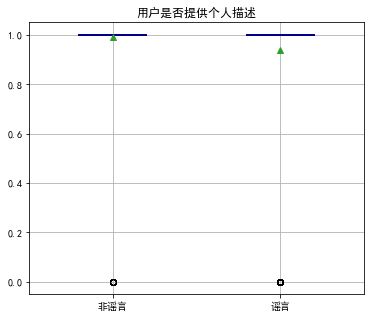

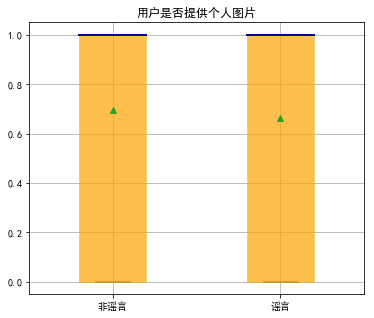

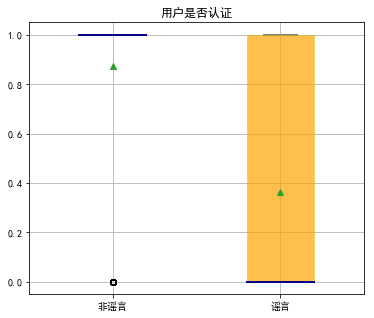

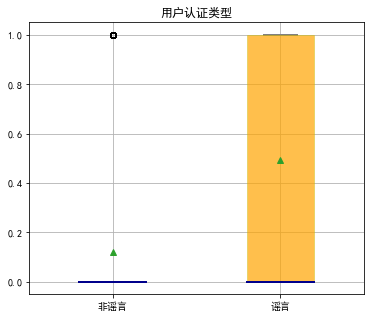

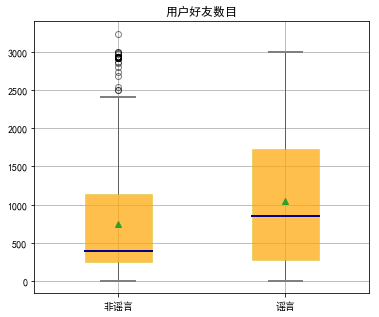

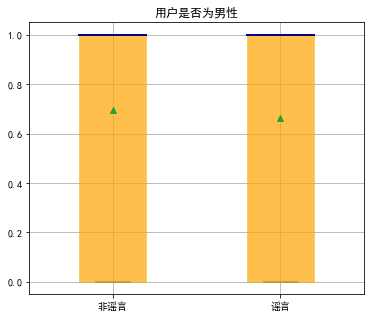

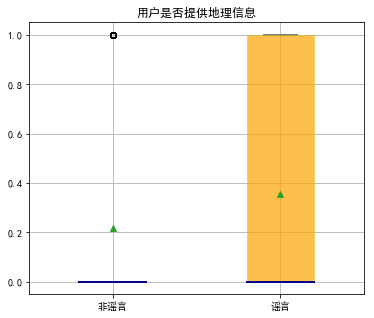

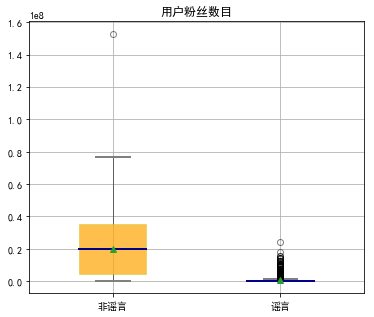

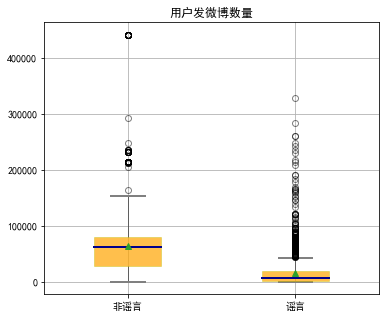

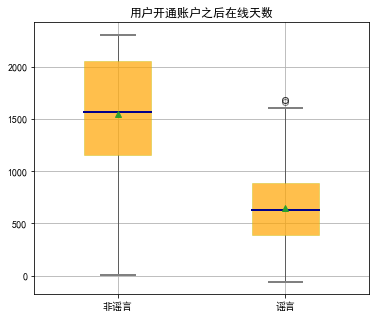

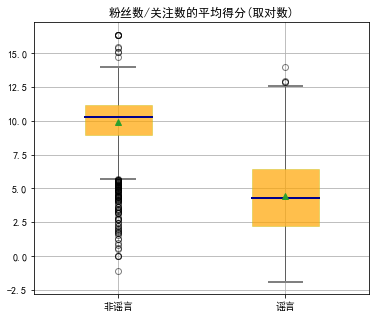

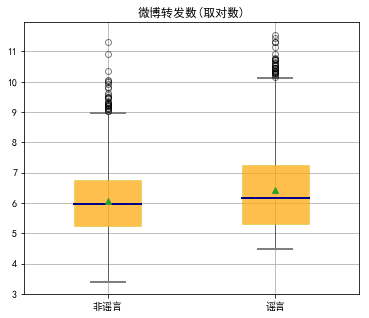

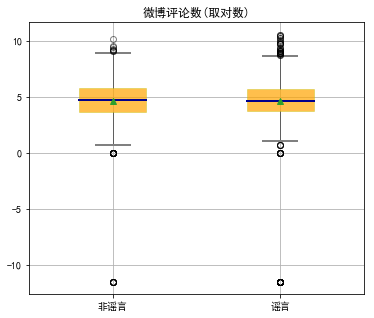

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# load data
Feature_nonrumor = np.load("./data/Feature_nonrumor.npy")
Feature_rumor = np.load("./data/Feature_rumor.npy")

features = ["微博当中是否携带链接", "微博当中是否含有第一人称代词", "微博的积极指数", 
            "微博的消极指数", "微博文本的平均长度", "微博当中褒义词的数量", 
            "微博当中贬义词的数量", "微博的情感得分", "微博当中含有微笑表情的数目", 
            "微博当中含有难过表情的数目", "微博当中是否携带标签", "微博当中是否携带@",
            "微博当中是否携带问号", "微博当中是否携带感叹号", "微博是否携带多个问句/感叹句标点",
            "用户是否提供个人描述", "用户是否提供个人图片", "用户是否认证", 
            "用户认证类型", "用户好友数目", "用户是否为男性", 
            "用户是否提供地理信息", "用户粉丝数目", "用户发微博数量", 
            "用户开通账户之后在线天数", "粉丝数/关注数的平均得分", "微博转发数", "微博评论数"]

plt.rcParams['font.sans-serif'] = ['SimHei'] # ensure display of chinese words
plt.rcParams['axes.unicode_minus'] = False   # ensure display of negative sign

for i in range(28):
    if i>=25:
        data = np.vstack((np.log(Feature_nonrumor[:, i]), np.log(Feature_rumor[:, i])))
        title = features[i]+"(取对数)"
    else:
        data = np.vstack((Feature_nonrumor[:, i], Feature_rumor[:, i]))
        title = features[i]
    df = pd.DataFrame(data.T, columns=["非谣言","谣言"])
    plt.figure(figsize =(6,5))
    f = df.boxplot(
        sym = 'o', 
        vert = True, 
        whis = 1.5, 
        patch_artist = True, 
        meanline = False, 
        showmeans = True, 
        showbox = True, 
        showcaps = True, 
        showfliers = True, 
        notch = False, 
        return_type = "dict", 
        widths=0.4
    )
    # set attributes of the boxplot
    for box in f['boxes']:
        box.set( color='y', linewidth=0.5) 
        box.set( facecolor = 'orange' ,alpha=0.7)
    for whisker in f['whiskers']:
        whisker.set(color='k', linewidth=0.5,linestyle='-')
    for cap in f['caps']:
        cap.set(color='gray', linewidth=2)
    for median in f['medians']:
        median.set(color='DarkBlue', linewidth=2)
    for flier in f['fliers']:
        flier.set(marker='o', color='y', alpha=0.5)   
    plt.title(title)                                      # set title
    #plt.savefig("./img/%d %s.png" % (i+1, features[i]))  # save figure
    plt.show()